# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \% 5$
2) $N^2 \% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту


In [45]:
import pandas as pd
all_data = pd.read_csv('../datasets/students_simple.csv')
cols = all_data.columns
print(all_data)

    height  mass  income   iq  pages  age    bmi  work_exp  friends  test_time
0      159    45     430   95     24   20  3.533        26        5        8.5
1      160    61     640  115     32   25  2.623        63        7        6.2
2      161    56     610  111     24   28  2.875        94       10        6.8
3      162    48     330   97     24   19  3.375        16        4       12.0
4      162    54     420  105     60   23  3.000        49        2        7.5
5      164    58     290   98     16   20  2.828        14        6       10.0
6      166    51     480  109     90   26  3.255        78        9        7.2
7      169    62     610  120     24   19  2.726        10        5        4.2
8      170    70     840  122     48   30  2.429       130       10        3.5
9      170    72     330   92     24   20  2.361        20        3        9.5
10     171    73     560  110     16   28  2.342        86        8        7.8
11     171    64     450  102     48   21  2.672    

In [46]:
N = 26
x_name = cols[N % 5]
y_name = cols[(N * N) % 5 + 5]
x = all_data[x_name]
y = all_data[y_name]
print(all_data[[x_name, y_name]])

    mass    bmi
0     45  3.533
1     61  2.623
2     56  2.875
3     48  3.375
4     54  3.000
5     58  2.828
6     51  3.255
7     62  2.726
8     70  2.429
9     72  2.361
10    73  2.342
11    64  2.672
12    73  2.356
13    68  2.559
14    81  2.173
15    84  2.095
16    76  2.342
17    90  2.011
18    68  2.691
19    95  2.021


# 1. Расчет корреляций

### 1.1. Фехнера
Для двух переменных X и Y:
$$ 𝑟 = \frac{𝑛_+ − 𝑛_−}{n} $$

где: 
$n_+$ — количество наблюдений, где знаки отклонений $(x_𝑖−\bar{x})$ и $(y_i	​− \bar{y})$ совпадают,

$n_−$ — количество наблюдений, где они разные,

n — общее число наблюдений.

In [47]:
import numpy as np 

x_mean = np.mean(x)
y_mean = np.mean(y)

x_dev = x - x_mean
y_dev = y - y_mean
same_sign = np.sign(x_dev) == np.sign(y_dev)

n_plus = np.sum(same_sign)
n_minus = len(x) - n_plus

r_fechner = (n_plus - n_minus) / len(x)

print(f"Коэффициент корреляции Фехнера: {r_fechner:.3f}")

Коэффициент корреляции Фехнера: -0.900


Это значит, что величины меняются относительно своих средних очень несогласованно

### 1.2. Пирсона + доверительный интервал
Формула корреляции Пирсона
$$ r = \frac{\sum{(x_i−\bar{x})(y_i−\bar{y})}}{\sum{(x_i−\bar{x})}^2\sum{(y_i−\bar{y})^2}} $$

Оценивает, насколько зависимость между величинами близка к линейной

Принимает значения от -1 до 1

- 1 - восходящая линейная зависимость
- 0 - нет зависимости
- -1 - нисходящая линейная зависимость

In [48]:
import math
from scipy.stats import norm

num = np.sum(x_dev @ y_dev)
den = np.sqrt((x_dev @ x_dev) * (y_dev @ y_dev))
r_pirson = num / den

print(f"Коэффициент корреляции Пирсона: {r_pirson:.3f}")

# Доверительный интервал через преобразование Фишера
z = 0.5 * math.log((1+r)/(1-r))
se = 1 / math.sqrt(len(x) - 3)

alpha = 0.05  # допустимая ошибка
z_crit = norm.ppf(1 - alpha/2)

z_lower = z - z_crit * se
z_upper = z + z_crit * se

r_lower = math.tanh(z_lower)
r_upper = math.tanh(z_upper)

print(f"{(1-alpha) * 100:.0f}% доверительный интервал: [{r_lower:.3f}, {r_upper:.3f}]")


Коэффициент корреляции Пирсона: -0.961
95% доверительный интервал: [-0.985, -0.901]


Из значения корреляции Пирсона делаем вывод, что имеется сильная отрицательная связь, зависимость между величинами близка к линейной

Вероятность того, что искомое значение лежит в интервале [-0.985, -0.901] - 95%. Это говорит о том, что зависимость скорее отрицательная

### 1.3. Спирмена

Вместо самих значений $x_i$ ,$y_i$, мы рассматриваем их ранги (порядковые номера).
$$\rho=1 - \frac{6\sum{d_i^2}}{n(n^2−1)} $$

где:
    
$d_i=R(x_i)−R(y_i)$ — разница рангов для i-го наблюдения,

$R(x_i)$, $R(y_i)$ — ранги элементов,   

n — количество наблюдений.

In [49]:
x_rank = pd.Series(x).rank()
y_rank = pd.Series(y).rank()

d = x_rank - y_rank

n = len(x)
rho = 1 - (6 * (d @ d) / (n * (n**2 - 1)))
print(f"Коэффициент корреляции Спирмена: {rho:.3f}")

Коэффициент корреляции Спирмена: -0.983


Полученное значение близко к -1 что означает сильную монотонно убывающую связь. Это подтверждается коэффициентом Пирсона

### 1.4. Кенделла

$$\tau=\frac{n_c−n_d}{\frac{1}{2}n(n−1)}$$

где:

$n_c$ — число согласованных пар,

$n_d$ — число несогласованных пар,

$n$ — общее количество наблюдений.

In [50]:
from itertools import combinations

n_c = 0
n_d = 0
n = len(x)

for (i,j) in combinations(range(n), 2):
    dx = np.sign(x[i] - x[j])
    dy = np.sign(y[i] - y[j])

    if dx*dy > 0:
        n_c += 1
    elif dx*dy < 0:
        n_d += 1
    
tau = (n_c - n_d) / (0.5 * n * (n-1))
print(f"Коэффициент корреляции Кенделла (τ): {tau:.3f}")


Коэффициент корреляции Кенделла (τ): -0.932


Коэффициент Кенделла, близкий к -1, означает сильную отрицательную несогласованность. Это подтверждается значениями коэффициентов Спирмена и Пирсона

## 2. Визуализация

### 2.1. Гистограммы

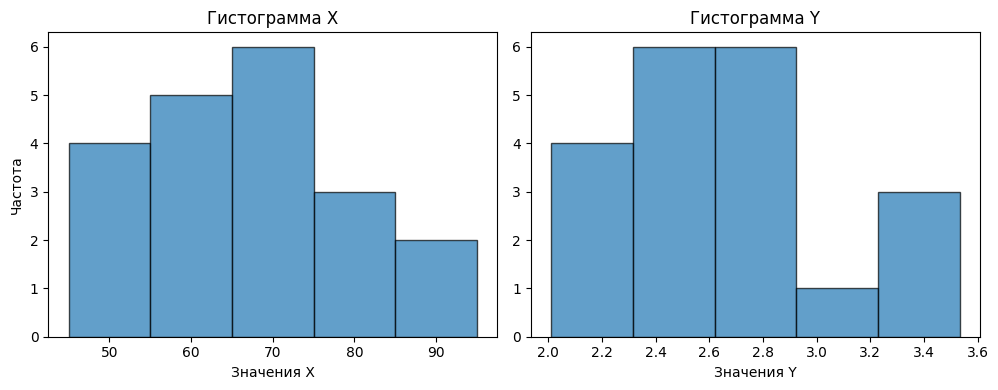

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Гистограмма X
plt.subplot(1, 2, 1)
plt.hist(x, bins=5, edgecolor='black', alpha=0.7)
plt.title("Гистограмма X")
plt.xlabel("Значения X")
plt.ylabel("Частота")

# Гистограмма Y
plt.subplot(1, 2, 2)
plt.hist(y, bins=5, edgecolor='black', alpha=0.7)
plt.title("Гистограмма Y")
plt.xlabel("Значения Y")

plt.tight_layout()
plt.show()


### 2.2. График рассеяния (scatter plot)

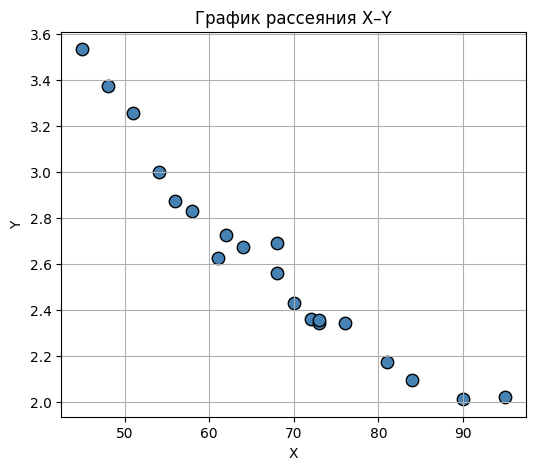

In [52]:
plt.figure(figsize=(6, 5))
plt.scatter(x, y, color='steelblue', edgecolor='black', s=80)
plt.title("График рассеяния X–Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


## 3. Уравнение регрессии
Построить уравнение регрессии по видам:

### 3.1. линейная, $y=w_1 x + w_0$

### 3.2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$

### 3.3. гиперболическая, $y = \frac{w_1}{x} + w_0$

### 3.4. показательная, $y = w_1^x \cdot w_0$

### Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера